In [37]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import Model, Input
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("neo.csv")

In [39]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


### Описание столбцов датасета
Датасет классификации астероидов по возможной угрозе Земле содержит следующие столбцы:
1. id - номер записи
2. name - идентификатор астероида согласно международному соглашению
3. est_diameter_min - минимальный диаметр в километрах
4. est_diameter_max - максимальный диаметр в километрах
5. relative_velocity - скорость относительно Земли
6. miss_distance - расстояние промаха
7. orbiting_body - тело, вокруг которого обращается астероид
8. sentry_object - занесен ли в список автоматической системы мониторинга
9. absolute_magnitude - внутренняя светимость
10. hazardous - угроза (правда или ложь)

In [41]:
df.drop('name', axis=1, inplace=True) # выкидываем названия, которые не несут полезной нагрузки в процессе обучения

In [42]:
df.head()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [43]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


По описанию различных характеристих столбцов можно судить, что выбросы практически отсутствуют для столбцов miss_distance, relative_velocity и absolute_magnitude (значения среднего и медианы расходятся относительно немного).

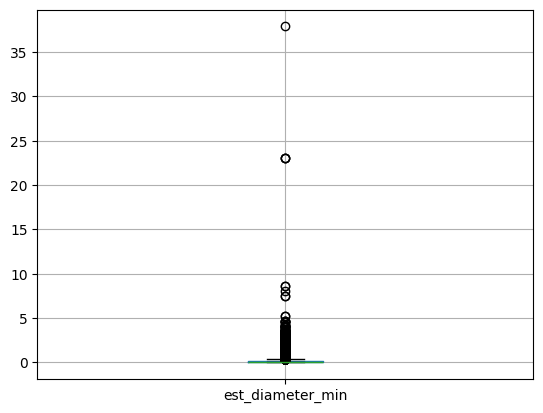

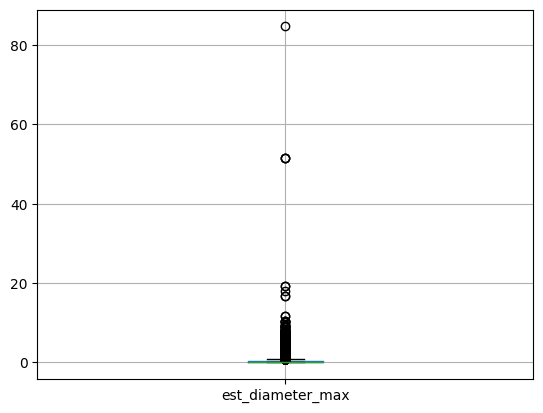

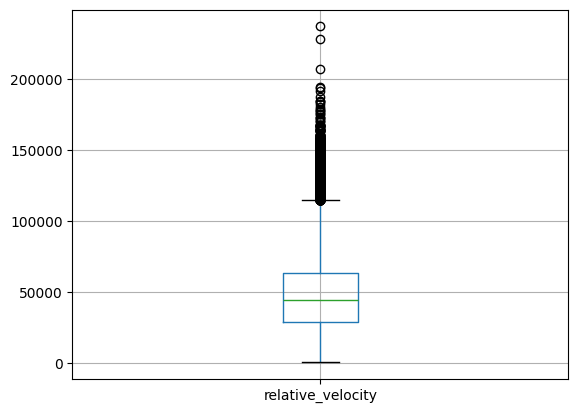

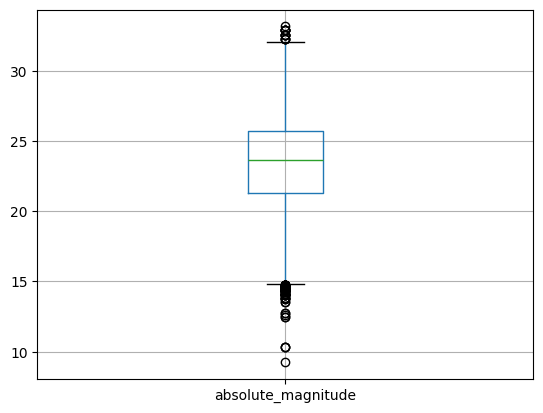

In [46]:
# Ящик с усами для est_diameter_min
df.boxplot(column=['est_diameter_min'])
plt.show()
# Ящик с усами для est_diameter_max
df.boxplot(column=['est_diameter_max'])
plt.show()
# Ящик с усами для relative_velocity
df.boxplot(column=['relative_velocity'])
plt.show()
# Ящик с усами для absolute_magnitude
df.boxplot(column=['absolute_magnitude'])
plt.show()

In [14]:
df.loc[df['est_diameter_min'] == df['est_diameter_min'].max()]

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
36418,2001036,37.89265,84.730541,51496.923293,5.372124e+07,Earth,False,9.23,False


In [15]:
df = df.drop(index=36418)

In [16]:
df.loc[df['est_diameter_min'] == df['est_diameter_min'].max()]

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
12709,2000433,23.043847,51.527608,15884.252623,5.468808e+07,Earth,False,10.31,False
37651,2000433,23.043847,51.527608,21402.705247,2.672952e+07,Earth,False,10.31,False
56533,2000433,23.043847,51.527608,21761.703426,3.120592e+07,Earth,False,10.31,False


In [17]:
df = df.drop(index=[12709, 37651, 56533])

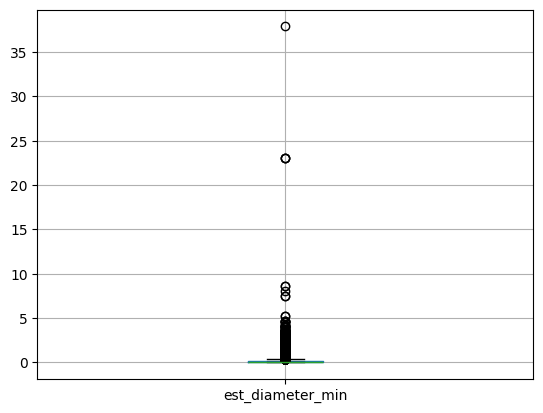

In [47]:
df.boxplot(column=['est_diameter_min'])
plt.show()

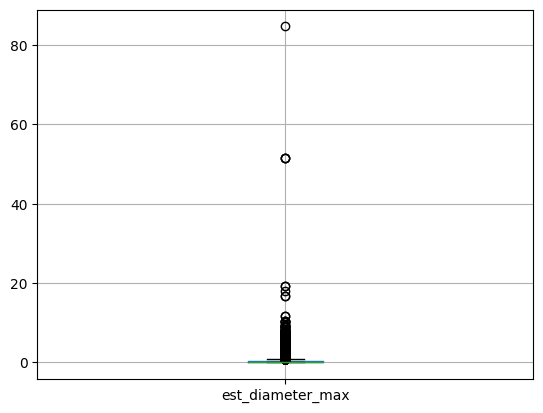

In [48]:
df.boxplot(column=['est_diameter_max'])
plt.show()

Были удалены наиболее выделяющиеся из общего пояса астероиды

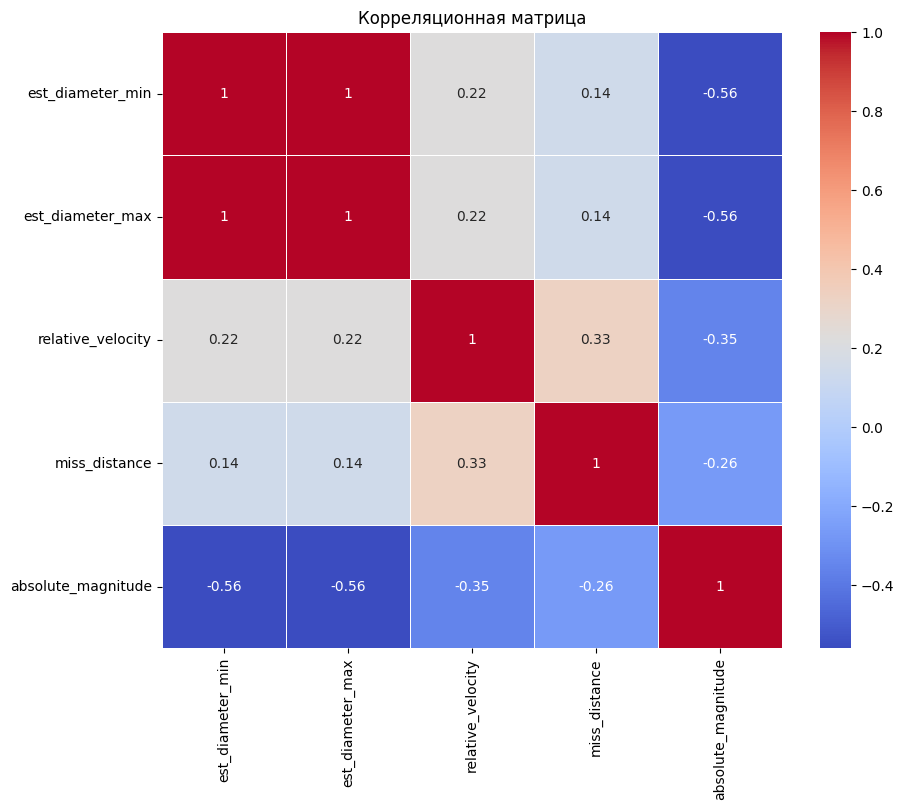

In [49]:
# Корреляционная матрица
plt.figure(figsize=(10, 8))

df_corr = df.copy()
df_corr.drop('id', axis=1, inplace=True)
df_corr.drop('orbiting_body', axis=1, inplace=True)
df_corr.drop('sentry_object', axis=1, inplace=True)
df_corr.drop('hazardous', axis=1, inplace=True)
correlation_matrix = df_corr.corr() # Получаем матрицу с помощью функции corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()


Наблюдается высокая корелляция между est_distance_min и est_distance_max, так как они по сути отражают размеры одного и того же астероида

Удалим остальные ненужные для обучения столбцы

In [21]:
df.drop(columns=['id'], inplace=True, axis=1)
df.drop(columns=['orbiting_body'], inplace=True, axis=1)
df.drop(columns=['sentry_object'], inplace=True, axis=1)
df.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


Разделяем данные на признаки и итоговые данные классификации

In [22]:
y = df['hazardous'].astype(int)
X = df.drop(columns=['hazardous'])

Масштабирование признаков с помощью MinMaxScaler

In [23]:
minmax_scaler = MinMaxScaler()
quantitative_cols = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']
X[quantitative_cols] = minmax_scaler.fit_transform(X[quantitative_cols])

In [24]:
X.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,0.138615,0.138615,0.056447,0.733141,0.206647
1,0.030693,0.030693,0.309922,0.821364,0.364162
2,0.083496,0.083496,0.481680,0.665740,0.259634
3,0.011099,0.011099,0.103726,0.339986,0.470135
4,0.029444,0.029444,0.179632,0.618634,0.368497


В процессе масштабирования столбцы размеров стали одинаковыми, поэтому один из них можно дропнуть

In [25]:
X.drop(columns=['est_diameter_min'], inplace=True, axis=1)

In [26]:
X.head()

,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,0.138615,0.056447,0.733141,0.206647
1,0.030693,0.309922,0.821364,0.364162
2,0.083496,0.481680,0.665740,0.259634
3,0.011099,0.103726,0.339986,0.470135
4,0.029444,0.179632,0.618634,0.368497


Приступаем к созданию нейронной сети

In [27]:
y = y.values
X = X.values
input_shape = X.shape[1]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

### Функции создания и обучения модели данных

In [29]:
def createModel(input_shape):
  input_x = Input(shape=(input_shape, ))
  fc1 = Dense(128, activation='relu')(input_x)
  fc2 = Dense(64, activation='relu')(fc1)
  fc3 = Dense(32, activation='relu')(fc2)
  out = Dense(1, activation='sigmoid')(fc3)
  return Model(inputs=input_x, outputs=out)

def trainModel(X_train, y_train):
  save_callback = ModelCheckpoint(filepath='model.weights.h5',
                                  monitor = 'val_loss',             # отслеживать каждую эпоху показать val_loss
                                  save_best_only = True,            # сохранять только самую лучшую модель
                                  save_weights_only=True,           # сохранять только веса модели (не всю модель);
                                  mode = 'min',                     # режим оптимизации min (найти минимальную ошибку)
                                  verbose=1)                        # 1 означает выводить информацию о нахождении и сохранении лучшей модели в процессе обучения, 0 означает не выводить.

  model = createModel(input_shape)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='binary_crossentropy',                             
                metrics=['accuracy'])                           
  model.summary()

  model.fit(x=X_train,
            y=y_train,
            epochs=300,
            batch_size=256,
            validation_split=0.1,
            callbacks=[save_callback]
            )
  return model

In [30]:
model = trainModel(X_train, y_train)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
241/256 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8888 - loss: 0.3868
Epoch 1: val_loss improved from inf to 0.21623, saving model to model.weights.h5
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8895 - loss: 0.3811 - val_accuracy: 0.9096 - val_loss: 0.2162
Epoch 2/300
250/256 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9043 - loss: 0.2194
Epoch 2: val_loss improved from 0.21623 to 0.19021, saving model to model.weights.h5
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9043 - loss: 0.2192 - val_accuracy: 0.9169 - val_loss: 0.1902
Epoch 3/300
229/256 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9091 - loss: 0.1982
Epoch 3: val_loss improved from 0.19021 to 0.18349, saving model to model.weights.h5
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9091 - loss: 0.1982 - val_accuracy: 0.9177 - val_loss: 0.1835
Epoch 4/300
247/256 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9099 - loss: 0.1912
Epoch 4: val_loss improved from 0.18349 to 0.18131

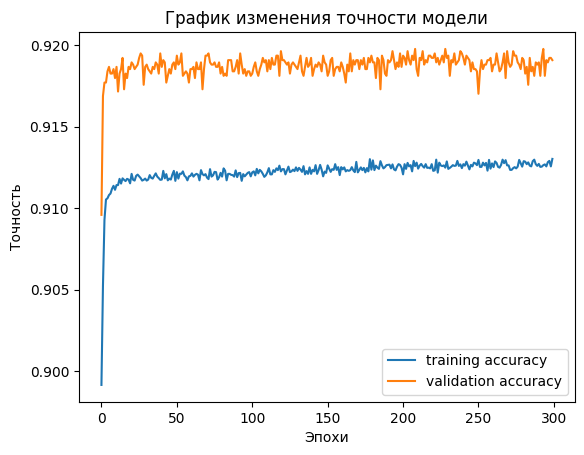

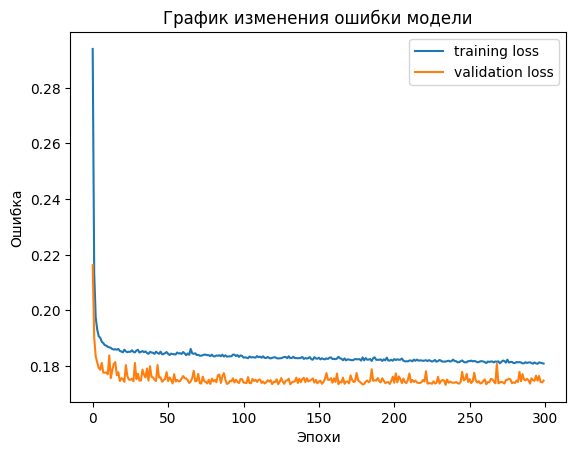

In [31]:
plt.figure()
plt.plot(model.history.history["accuracy"], label="training accuracy")
plt.plot(model.history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.title("График изменения точности модели")
plt.xlabel("Эпохи")
plt.ylabel("Точность")
plt.show()

plt.figure()
plt.plot(model.history.history["loss"], label="training loss")
plt.plot(model.history.history["val_loss"], label="validation loss")
plt.legend()
plt.title("График изменения ошибки модели")
plt.xlabel("Эпохи")
plt.ylabel("Ошибка")
plt.show()

In [32]:
model.load_weights('./model.weights.h5')
mlp_loss, mlp_accuracy = model.evaluate(X_test, y_test)
print("Точность модели MLP: " + str(mlp_accuracy))

568/568 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9175 - loss: 0.1766
Точность модели MLP: 0.9130841493606567


In [33]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
print("Classification Report for LogisticRegression")
print(classification_report(y_test, log_reg_pred))

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("Classification Report for KNeighborsClassifier")
print(classification_report(y_test, knn_pred))

random_forset = RandomForestClassifier()
random_forset.fit(X_train, y_train)
random_forset_pred = random_forset.predict(X_test)
print("Classification Report for RandomForestClassifier")
print(classification_report(y_test, random_forset_pred))

mlp_pred = (model.predict(X_test).flatten() >= 0.5).astype(int) # осуществляем предсказание классов для тестовых данных и применяем решающее правило для выходных вероятностей
print("Classification Report for Our Multilayer Perceptron")
print(classification_report(y_test, mlp_pred.flatten()))

Classification Report for LogisticRegression
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     16444
           1       0.43      0.06      0.10      1723

    accuracy                           0.90     18167
   macro avg       0.67      0.52      0.52     18167
weighted avg       0.86      0.90      0.87     18167

Classification Report for KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     16444
           1       0.46      0.29      0.36      1723

    accuracy                           0.90     18167
   macro avg       0.70      0.63      0.65     18167
weighted avg       0.88      0.90      0.89     18167

Classification Report for RandomForestClassifier
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     16444
           1       0.58      0.38      0.46      1723

    accuracy                           0.

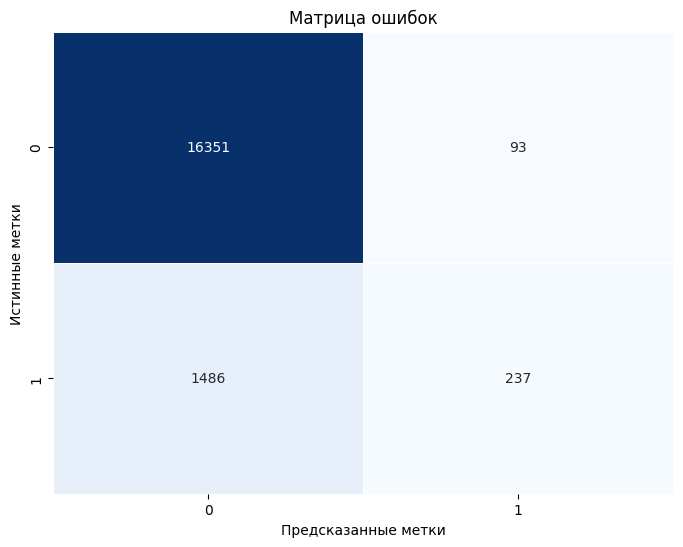

In [34]:
from sklearn.metrics import confusion_matrix

# Построим матрицу ошибок для оценки качества классификационной модели
# Матрица ошибок имеет вид таблицы, где:
# Строки представляют фактические классы (истинные метки),
# Столбцы представляют предсказанные классы (то, что модель предсказала).
cm = confusion_matrix(y_test, mlp_pred)

cm_df = pd.DataFrame(cm,
                     index=np.unique(y_test),
                     columns=np.unique(y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Матрица ошибок')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.show()